In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import dask.dataframe as dd

In [20]:
IMG_DIR = './analysis'
DPI=120

## Loading data using Dask (loads lazily)

In [8]:
# http://dask.pydata.org/en/latest/dataframe-overview.html
%time lazy_df = dd.read_csv('./data/2001.csv', encoding='iso-8859-1')

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 48.9 ms


In [9]:
%time len(lazy_df)

CPU times: user 25 s, sys: 13.3 s, total: 38.3 s
Wall time: 19.8 s


5967780

In [10]:
# http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.sample
s = 10000  # desired sample size
n = 5967780
fraction = s / n
df = lazy_df.sample(fraction)

In [11]:
%time len(df)

CPU times: user 24.7 s, sys: 9.12 s, total: 33.8 s
Wall time: 14.7 s


9999

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
182213,2001,1,26,5,553.0,550,704.0,658,TW,500,...,5,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
155504,2001,1,5,5,717.0,635,903.0,800,NW,1193,...,5,45,0,NaN,0,NaN,NaN,NaN,NaN,NaN
582620,2001,2,25,7,1734.0,1540,1852.0,1705,WN,130,...,2,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
118211,2001,1,4,4,1720.0,1705,2056.0,2055,WN,1775,...,3,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
388092,2001,1,11,4,1222.0,1225,1439.0,1450,NW,39,...,7,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Create numeral versions of categoricals for later analysis

In [13]:
# first turn our 10000 samples into a normal pandas df for convenience
%time df = df.compute()

CPU times: user 25.2 s, sys: 8.56 s, total: 33.7 s
Wall time: 15.5 s


In [14]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# turn those text labels into numerical
text_cols = ['UniqueCarrier', 'Origin', 'Dest']
le = preprocessing.LabelEncoder()
for c in text_cols:
    # print (c,set(df[c].values))
    flist = list(set(df[c].values))
    # print(flist)
    le.fit(flist)
    leo = le.transform(flist)
    # print (c,flist,leo)
    df[c+'_'] = df[c]
    df[c+'_'].replace(flist,value=leo,inplace=True)

In [15]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
182213,2001,1,26,5,553.0,550,704.0,658,TW,500,...,NaN,0,NaN,NaN,NaN,NaN,NaN,8,145,194
155504,2001,1,5,5,717.0,635,903.0,800,NW,1193,...,NaN,0,NaN,NaN,NaN,NaN,NaN,7,55,110
582620,2001,2,25,7,1734.0,1540,1852.0,1705,WN,130,...,NaN,0,NaN,NaN,NaN,NaN,NaN,11,188,155
118211,2001,1,4,4,1720.0,1705,2056.0,2055,WN,1775,...,NaN,0,NaN,NaN,NaN,NaN,NaN,11,187,194
388092,2001,1,11,4,1222.0,1225,1439.0,1450,NW,39,...,NaN,0,NaN,NaN,NaN,NaN,NaN,7,55,157


## Reaplace NaN with -1 (we have plenty of them)

In [16]:
df.fillna(-1, inplace=True)

In [17]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
182213,2001,1,26,5,553.0,550,704.0,658,TW,500,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,8,145,194
155504,2001,1,5,5,717.0,635,903.0,800,NW,1193,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,110
582620,2001,2,25,7,1734.0,1540,1852.0,1705,WN,130,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,188,155
118211,2001,1,4,4,1720.0,1705,2056.0,2055,WN,1775,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,187,194
388092,2001,1,11,4,1222.0,1225,1439.0,1450,NW,39,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,157


In [18]:
cols_for_correlation = [
    'DayOfWeek',
    'DepTime',
    'ArrTime',
    'ArrDelay',
    'Distance',
    'UniqueCarrier_',
    'Origin_',
    'Dest_'
]

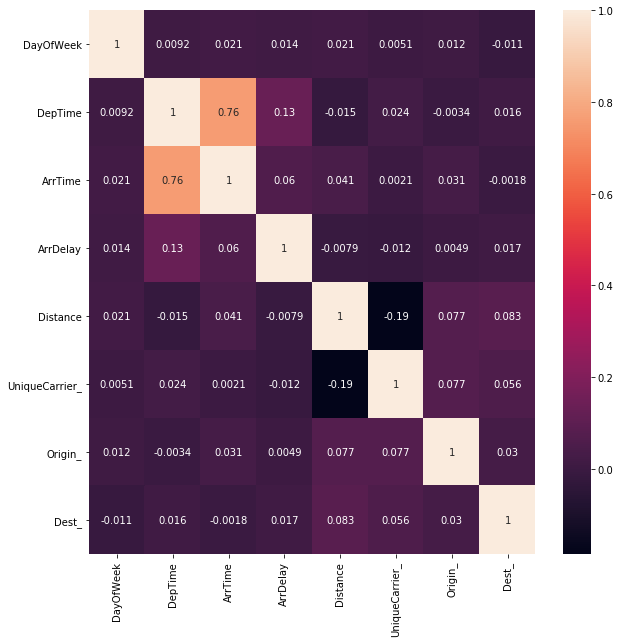

In [22]:
corrmat = df[cols_for_correlation].corr()
sns.heatmap(corrmat, annot=True)
figure = plt.gcf()
figure.set_size_inches(10, 10)
plt.show()
# plt.savefig(IMG_DIR+'/corr.png', dpi = DPI)

In [23]:
def plot(col1, col2):
    # https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
    sns.jointplot(df[col1],df[col2],dropna=True, kind="hex")
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    # for notebook
    plt.show()
#     plt.savefig('%s/%s_%s.png'%(IMG_DIR, col1, col2), dpi = DPI)

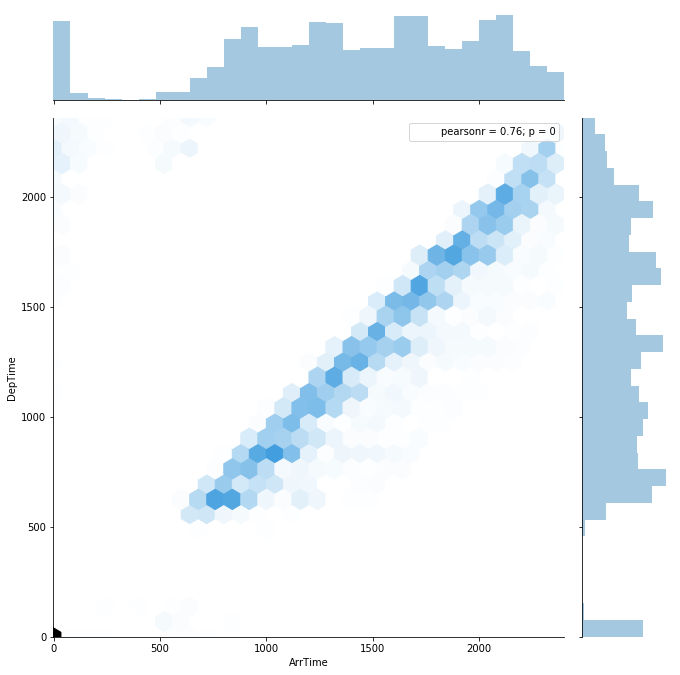

In [24]:
plot('ArrTime', 'DepTime')

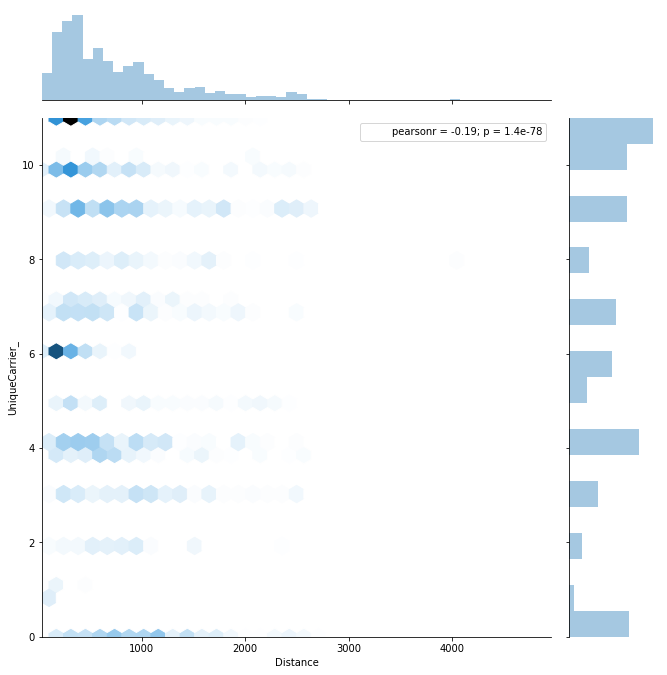

In [25]:
plot('Distance', 'UniqueCarrier_')

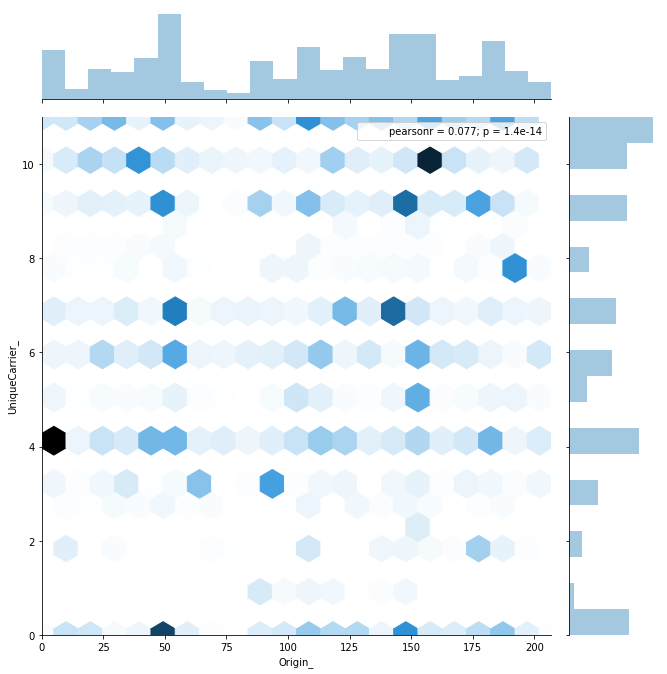

In [26]:
plot('Origin_', 'UniqueCarrier_')

## Correct some timestamps and add a composed timestamp for easy reference

In [27]:
# 2400 is not a valid time
df['CRSDepTime'] = df.apply(lambda row: 2359 if row['CRSDepTime'] == 2400 else row['CRSDepTime'],axis='columns')

In [28]:
df['@timestamp'] = df.apply(lambda row: pd.Timestamp('%s-%s-%s;%04d'%(row['Year'], row['Month'], row['DayofMonth'], row['CRSDepTime'])),axis='columns')

In [29]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
182213,2001,1,26,5,553.0,550,704.0,658,TW,500,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,8,145,194,2001-01-26 05:50:00
155504,2001,1,5,5,717.0,635,903.0,800,NW,1193,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,110,2001-01-05 06:35:00
582620,2001,2,25,7,1734.0,1540,1852.0,1705,WN,130,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,188,155,2001-02-25 15:40:00
118211,2001,1,4,4,1720.0,1705,2056.0,2055,WN,1775,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,187,194,2001-01-04 17:05:00
388092,2001,1,11,4,1222.0,1225,1439.0,1450,NW,39,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,157,2001-01-11 12:25:00


In [30]:
timestamps = df['@timestamp']

In [31]:
# plt.hist?

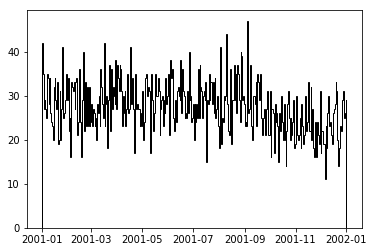

In [32]:
plt.hist(timestamps.tolist(), bins=365, histtype = 'step', color='black')
plt.show()

In [33]:
10000 / 365

27.397260273972602

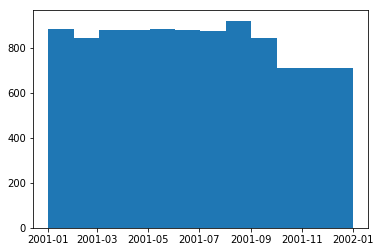

In [34]:
plt.hist(timestamps.tolist(), bins=12, histtype = 'bar')
plt.show()

## Convert fields 'cancelled' and 'diverted' to boolean

In [35]:
df['Cancelled'] = df.apply(lambda row: False if row['Cancelled'] == 0 else True, axis='columns')
df['Diverted'] = df.apply(lambda row: False if row['Diverted'] == 0 else True, axis='columns')

In [36]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
182213,2001,1,26,5,553.0,550,704.0,658,TW,500,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,8,145,194,2001-01-26 05:50:00
155504,2001,1,5,5,717.0,635,903.0,800,NW,1193,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,110,2001-01-05 06:35:00
582620,2001,2,25,7,1734.0,1540,1852.0,1705,WN,130,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,11,188,155,2001-02-25 15:40:00
118211,2001,1,4,4,1720.0,1705,2056.0,2055,WN,1775,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,11,187,194,2001-01-04 17:05:00
388092,2001,1,11,4,1222.0,1225,1439.0,1450,NW,39,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,7,55,157,2001-01-11 12:25:00
